In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [2]:
data=pd.read_excel("E:\TY\Semester 6\Data minning and ware housing\project\Dataset2).xlsx")

In [3]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden weight loss',
       'Weakness', 'Polyphagia', 'Genital thrush', 'Visual blurring',
       'Itching', 'Irritability', 'Delayed healing', 'Partial paresis',
       'Muscle stiffness', 'Alopecia', 'Obesity', 'Class'],
      dtype='object')

In [4]:
data.head()

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
data.shape

(520, 17)

In [6]:
#checking missing values per feature
data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden weight loss    0
Weakness              0
Polyphagia            0
Genital thrush        0
Visual blurring       0
Itching               0
Irritability          0
Delayed healing       0
Partial paresis       0
Muscle stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64

In [7]:
# Summary statistics
describe=data.describe()

In [8]:
# Data types
data.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
Sudden weight loss    object
Weakness              object
Polyphagia            object
Genital thrush        object
Visual blurring       object
Itching               object
Irritability          object
Delayed healing       object
Partial paresis       object
Muscle stiffness      object
Alopecia              object
Obesity               object
Class                 object
dtype: object

In [9]:
# Display the first few rows
head=data.head()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data.Class.value_counts()

Class
Positive    320
Negative    200
Name: count, dtype: int64

Text(0.5, 1.0, 'Plot of class')

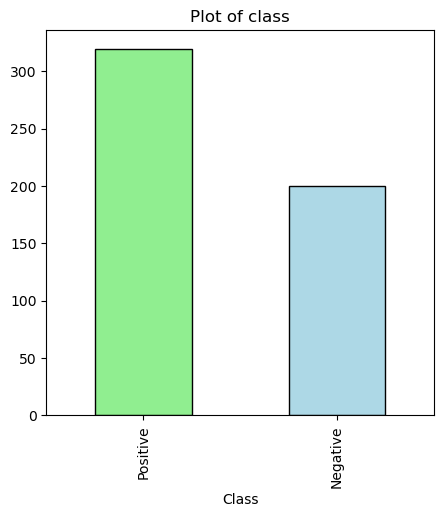

In [12]:
plt.figure(figsize=(8, 6)) 
diabetes_class = data['Class'].value_counts()
diabetes_class.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of class')

Text(0.5, 1.0, 'Plot of Gender')

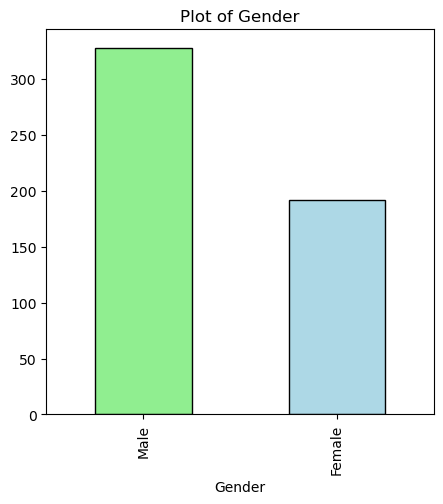

In [13]:
#plotting barchart for distribution of gender
plt.figure(figsize=(8, 6)) 
Gender = data['Gender'].value_counts()
Gender.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Gender')

<Axes: xlabel='Gender', ylabel='count'>

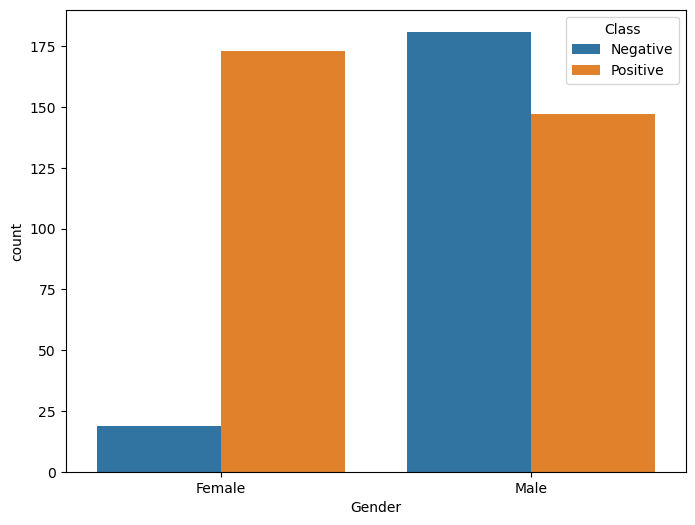

In [14]:
#plotting barchart for distribution of gender with result of diabetes
grouped_data = data.groupby(['Gender', 'Class']).size().reset_index(name='count')
# Plot the countplot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x='Gender', y='count', hue='Class')

In [15]:
data.Gender.value_counts()

Gender
Male      328
Female    192
Name: count, dtype: int64

In [16]:
#plotting target variable with respect to Gender variable
plt.figure(figsize=(8, 6))
plot_criteria= ['Gender', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


<Figure size 800x600 with 0 Axes>

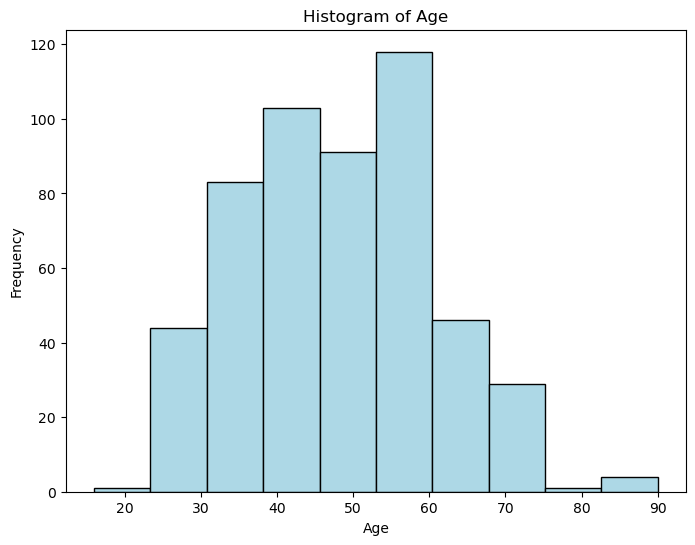

In [17]:
plt.figure(figsize=(8, 6))  
plt.hist(data['Age'], color='lightblue', edgecolor='black')
plt.title('Histogram of Age')  
plt.xlabel('Age')  
plt.ylabel('Frequency')   
plt.show()

Text(0.5, 1.0, 'Plot of Polyuria')

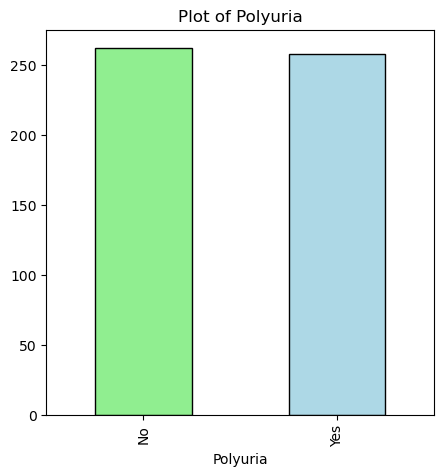

In [18]:
#plotting Polyuria 
plt.figure(figsize=(8, 6)) 
Polyuria = data['Polyuria'].value_counts()
Polyuria.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Polyuria')

In [19]:
#plotting target variable wrt Polyuria variable
plot_criteria= ['Polyuria', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


Text(0.5, 1.0, 'Plot of Polydipsia')

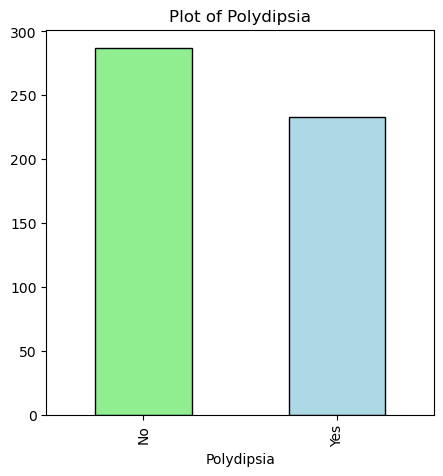

In [20]:
#plotting Polydispia 
plt.figure(figsize=(8, 6)) 
Polydipsia = data['Polydipsia'].value_counts()
Polydipsia.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Polydipsia')

In [21]:
#plotting target variable wrt Polydispia variable
plot_criteria= ['Polydipsia', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


Text(0.5, 1.0, 'Plot of Sudden Weight Loss')

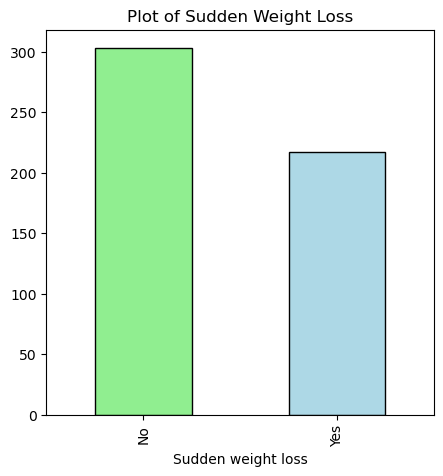

In [22]:
plt.figure(figsize=(8, 6)) 
sudden_weight_loss = data['Sudden weight loss'].value_counts()
sudden_weight_loss.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Sudden Weight Loss')

In [23]:
#plotting target variable wrt sudden weight loss variable
plot_criteria= ['Sudden weight loss', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


Text(0.5, 1.0, 'Plot of Weakness')

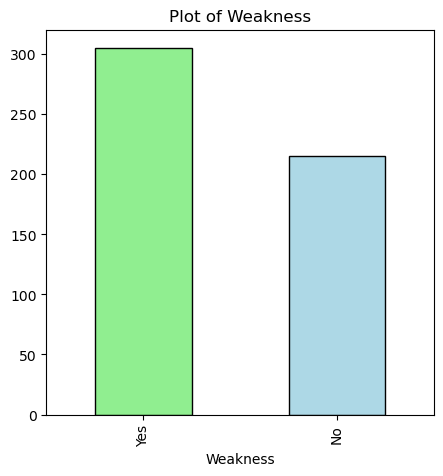

In [24]:
plt.figure(figsize=(8, 6)) 
weakness = data['Weakness'].value_counts()
weakness.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Weakness')

In [25]:
plot_criteria= ['Weakness', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


Text(0.5, 1.0, 'Plot of Polyphagia')

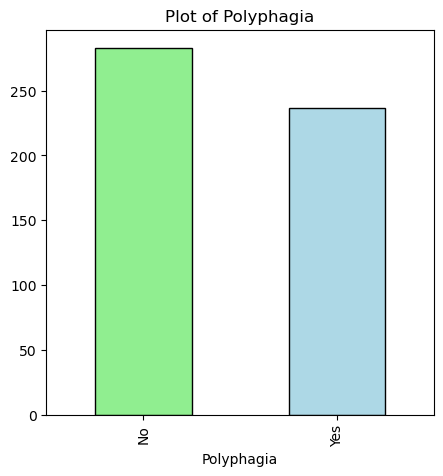

In [26]:
plt.figure(figsize=(8, 6)) 
Polyphagia = data['Polyphagia'].value_counts()
Polyphagia.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Polyphagia')

In [27]:
plot_criteria= ['Polyphagia', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


Text(0.5, 1.0, 'Plot of Genital thrush')

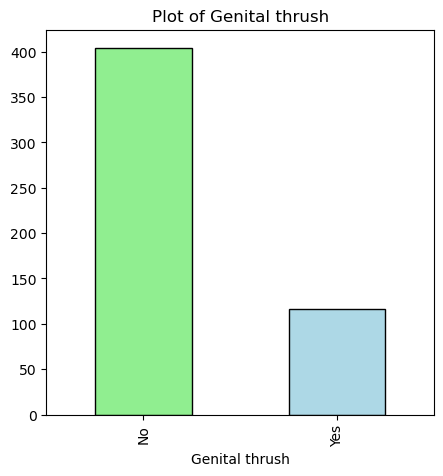

In [28]:
plt.figure(figsize=(8, 6)) 
Genital_thrush = data['Genital thrush'].value_counts()
Genital_thrush.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Genital thrush')

In [29]:
plot_criteria= ['Genital thrush', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


Text(0.5, 1.0, 'Plot of Visual Blurring')

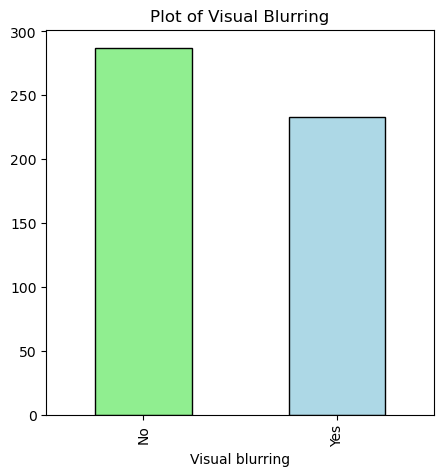

In [30]:
plt.figure(figsize=(8, 6)) 
visual_blurring = data['Visual blurring'].value_counts()
visual_blurring.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Visual Blurring')

In [31]:
plot_criteria= ['Visual blurring', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


Text(0.5, 1.0, 'Plot of Itching')

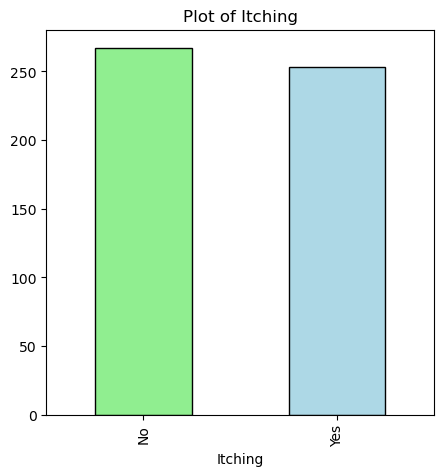

In [32]:
plt.figure(figsize=(8, 6)) 
Itching = data['Itching'].value_counts()
Itching.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Itching')

In [33]:
plot_criteria= ['Itching', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


Text(0.5, 1.0, 'Plot of Irritability')

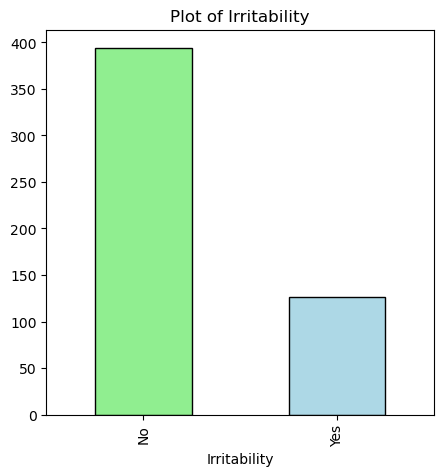

In [34]:
plt.figure(figsize=(8, 6)) 
Irritability = data['Irritability'].value_counts()
Irritability.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Irritability')

In [35]:
plot_criteria= ['Irritability', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


Text(0.5, 1.0, 'Plot of Delayed Healing')

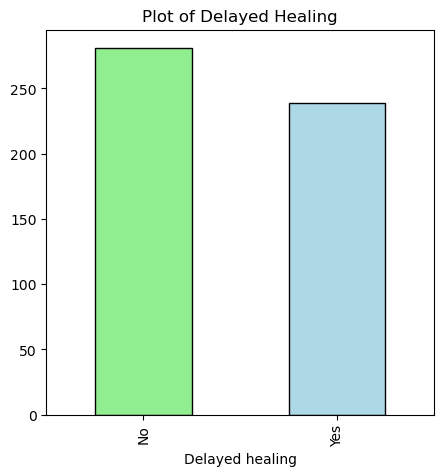

In [36]:
plt.figure(figsize=(8, 6)) 
delayed_healing = data['Delayed healing'].value_counts()
delayed_healing.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Delayed Healing')

In [37]:
plot_criteria= ['Delayed healing', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


Text(0.5, 1.0, 'Plot of Partial Paresis')

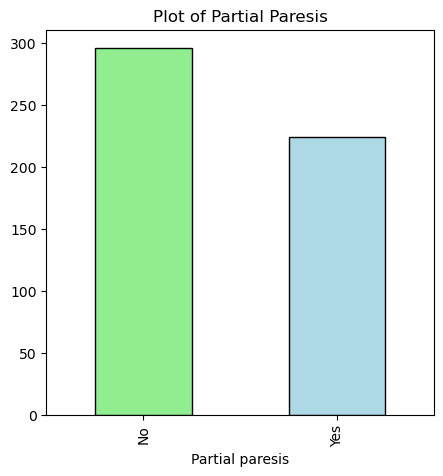

In [38]:
plt.figure(figsize=(8, 6)) 
partial_paresis = data['Partial paresis'].value_counts()
partial_paresis.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Partial Paresis')

In [39]:
plot_criteria= ['Partial paresis', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


Text(0.5, 1.0, 'Plot of Muscle Stiffness')

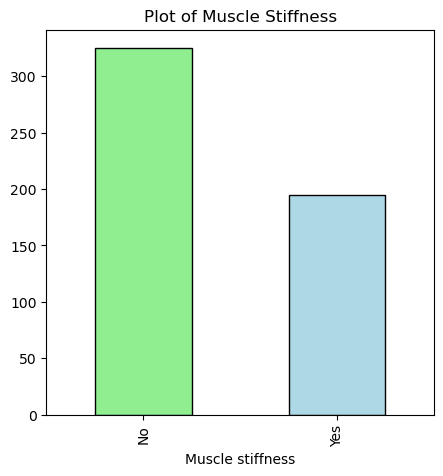

In [40]:
plt.figure(figsize=(8, 6)) 
muscle_stiffness = data['Muscle stiffness'].value_counts()
muscle_stiffness.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Muscle Stiffness')

In [41]:
plot_criteria= ['Muscle stiffness', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


Text(0.5, 1.0, 'Plot of Obesity')

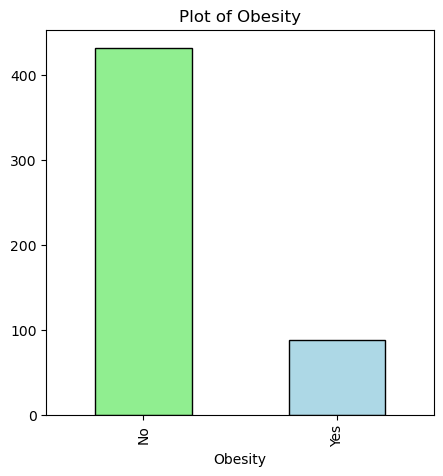

In [42]:
plt.figure(figsize=(8, 6)) 
Obesity = data['Obesity'].value_counts()
Obesity.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Obesity')


In [43]:
plot_criteria= ['Obesity', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


Text(0.5, 1.0, 'Plot of Alopecia')

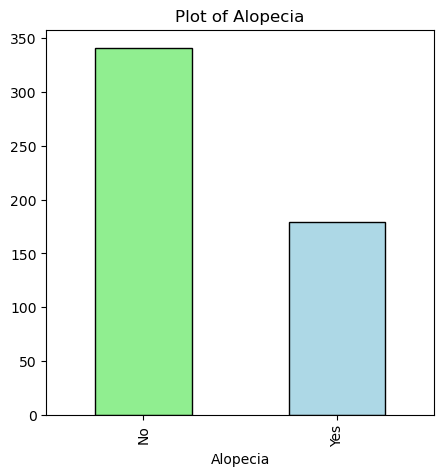

In [44]:
plt.figure(figsize=(8, 6)) 
Alopecia = data['Alopecia'].value_counts()
Alopecia.plot(kind = 'bar', color= ['lightgreen', 'lightblue'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Alopecia')

In [45]:
plot_criteria= ['Alopecia', 'Class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


In [46]:
# transforming target column from string to numeric format
data['Class'] = data['Class'].apply(lambda x: 0 if x=='Negative' else 1)

In [47]:
# creating feature and target variable
X= data.drop(['Class'],axis=1)
y=data['Class']

In [48]:
#creating a list of object datatypes

objList = X.select_dtypes(include = "object").columns

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   Sudden weight loss  520 non-null    int32
 5   Weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   Visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  Delayed healing     520 non-null    int32
 12  Partial paresis     520 non-null    int32
 13  Muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

In [49]:
X.head()

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [50]:
# calculating correlation of all the input variables with target variable
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
Sudden weight loss    0.436568
Weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
Visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
Delayed healing       0.046980
Partial paresis       0.432288
Muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

In [51]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)

## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
Class
1    256
0    160
Name: count, dtype: int64
Distribution of traget variable in test set
Class
1    64
0    40
Name: count, dtype: int64


In [52]:
# instantiating minmax scaling object
minmax = MinMaxScaler()
#apply minmax scaling on Age feature
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

X_train.head()

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity
246,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
274,0.554054,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
424,0.364865,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
316,0.527027,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
159,0.297297,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0


In [53]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.984127,0.96875,0.976378,0.971875


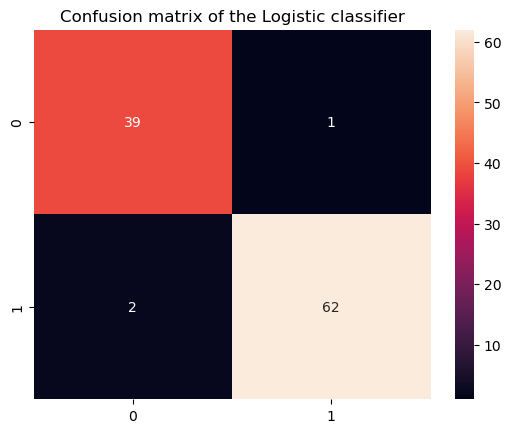

In [55]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

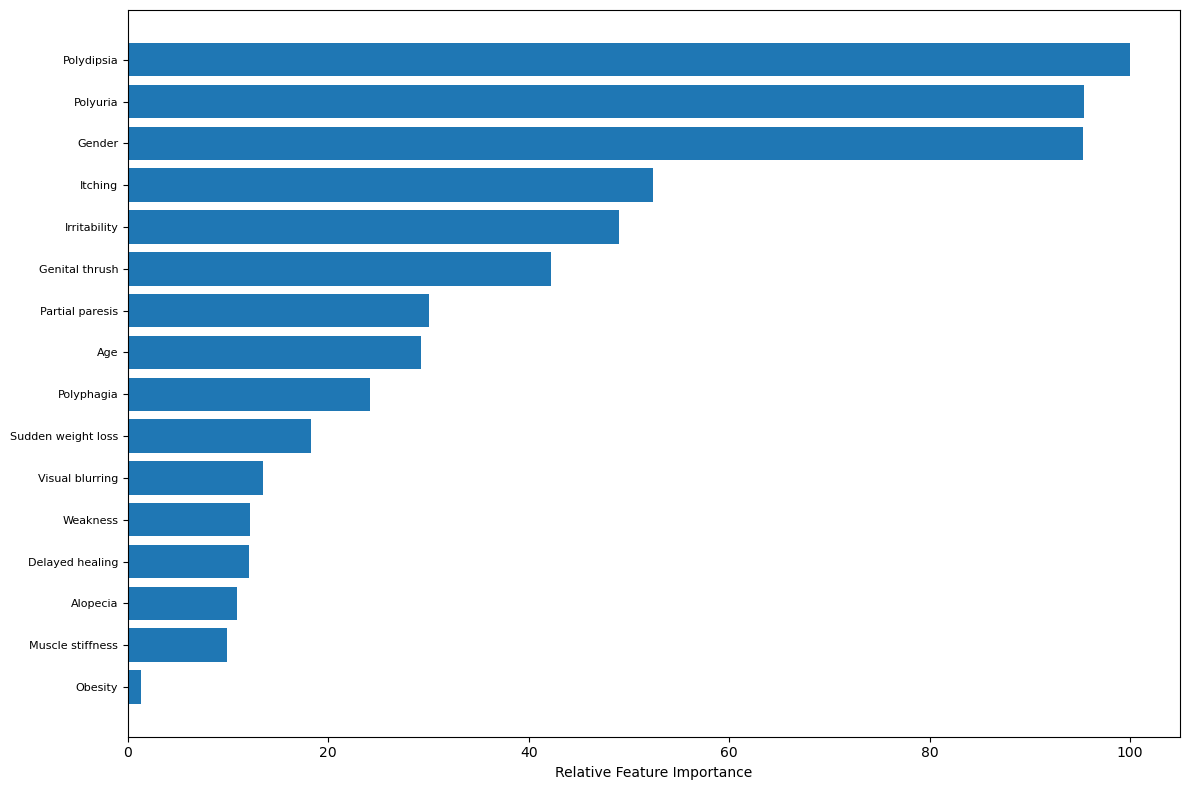

In [56]:
#plotting feature importance
feature_importance = abs(logi.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [57]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X,y)

SVC(kernel='linear')

In [58]:
y_predict_svm = svm.predict(X_test)
acc= accuracy_score(y_test, y_predict_svm)
roc=roc_auc_score(y_test, y_predict_svm)
prec = precision_score(y_test, y_predict_svm)
rec = recall_score(y_test, y_predict_svm)
f1 = f1_score(y_test, y_predict_svm)

results = pd.DataFrame([['Support Vector Machine',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.903846,0.875,0.984375,0.926471,0.879687


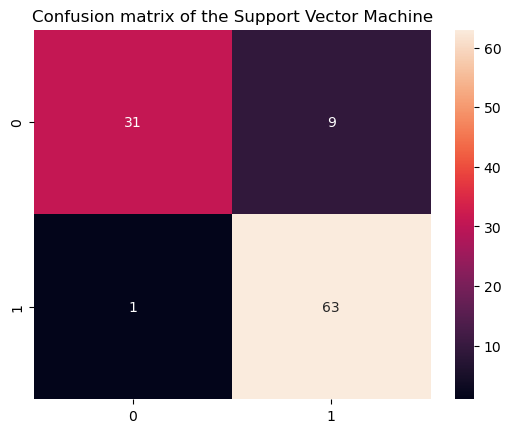

In [59]:
cm_svm = confusion_matrix(y_test, y_predict_svm)
plt.title('Confusion matrix of the Support Vector Machine')
sns.heatmap(cm_svm,annot=True,fmt="d")
plt.show()

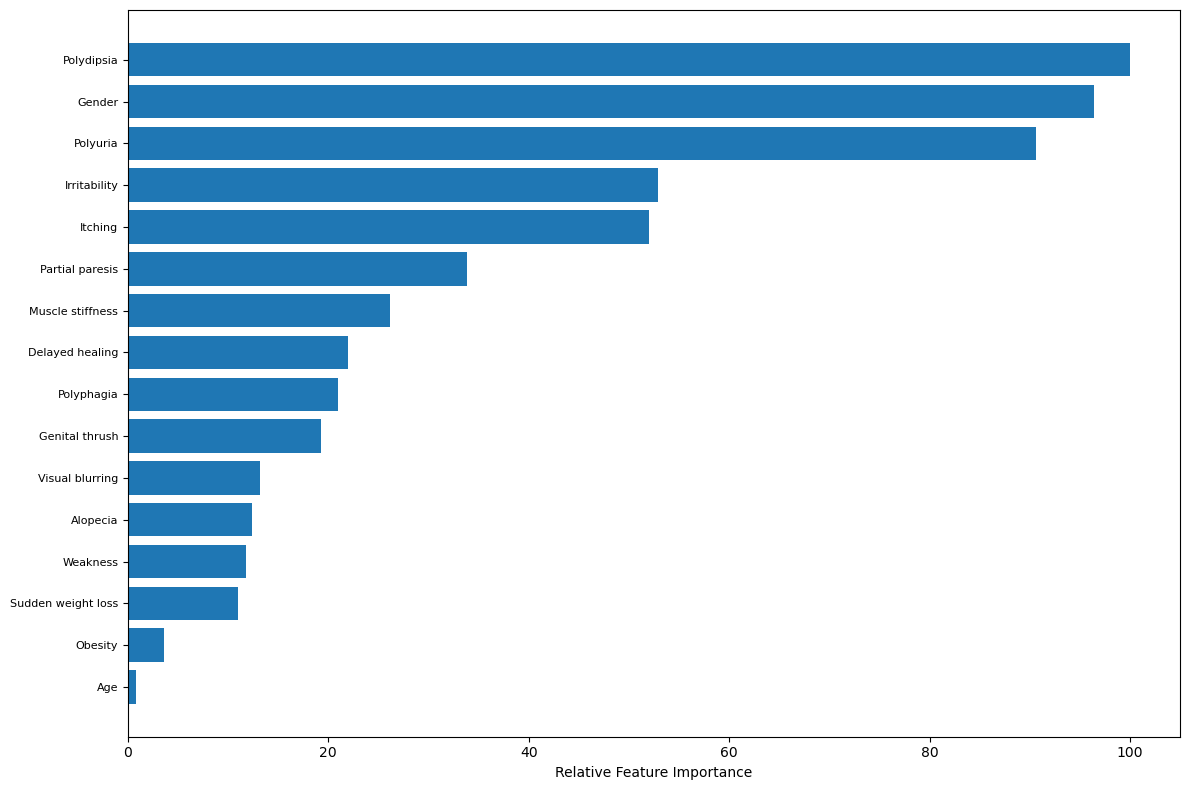

In [60]:
#plotting feature importance
feature_importance = abs(svm.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)

GaussianNB()

In [62]:
y_predict_gnb = gnb.predict(X_test)
acc= accuracy_score(y_test, y_predict_gnb)
roc=roc_auc_score(y_test, y_predict_gnb)
prec = precision_score(y_test, y_predict_gnb)
rec = recall_score(y_test, y_predict_gnb)
f1 = f1_score(y_test, y_predict_gnb)

results = pd.DataFrame([['Guassian Naive Bayes',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Guassian Naive Bayes,0.913462,0.936508,0.921875,0.929134,0.910938


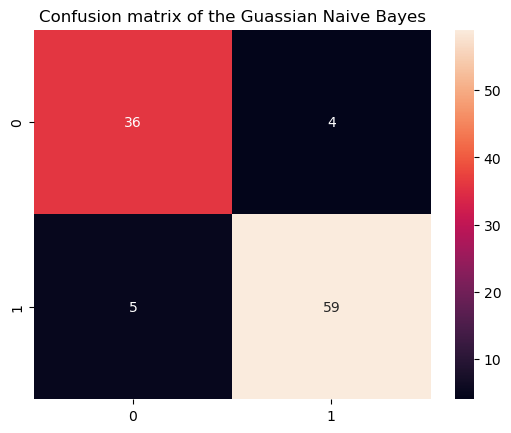

In [63]:
cm_gnb = confusion_matrix(y_test, y_predict_gnb)
plt.title('Confusion matrix of the Guassian Naive Bayes')
sns.heatmap(cm_gnb,annot=True,fmt="d")
plt.show()

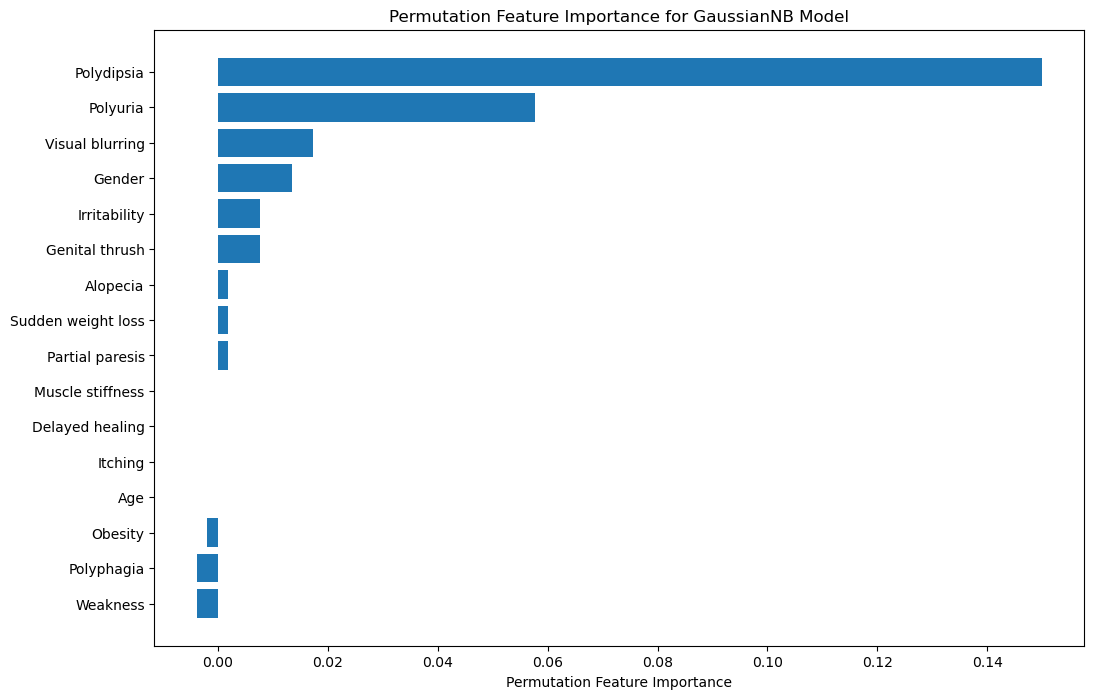

In [64]:
from sklearn.inspection import permutation_importance
# Compute permutation feature importance
result = permutation_importance(gnb, X_test, y_test)

# Sort the feature importance values and indices
sorted_idx = result.importances_mean.argsort()

# Plot the permutation feature importance
plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(X_train.columns)), result.importances_mean[sorted_idx])
plt.yticks(np.arange(len(X_train.columns)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for GaussianNB Model')
plt.show()

In [65]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

results = pd.DataFrame([['Random Forest (Untuned)',acc, prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest (Untuned),0.980769,1.0,0.96875,0.984127,0.984375


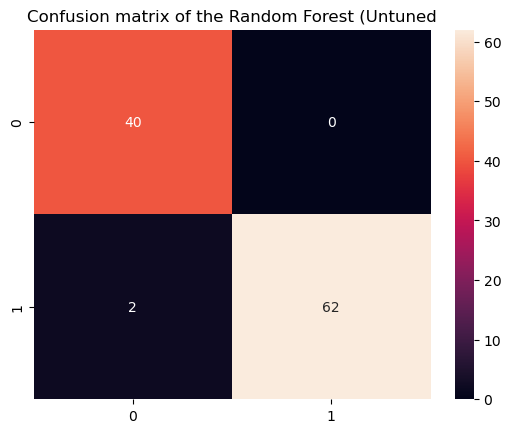

In [67]:
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest (Untuned')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

<Axes: >

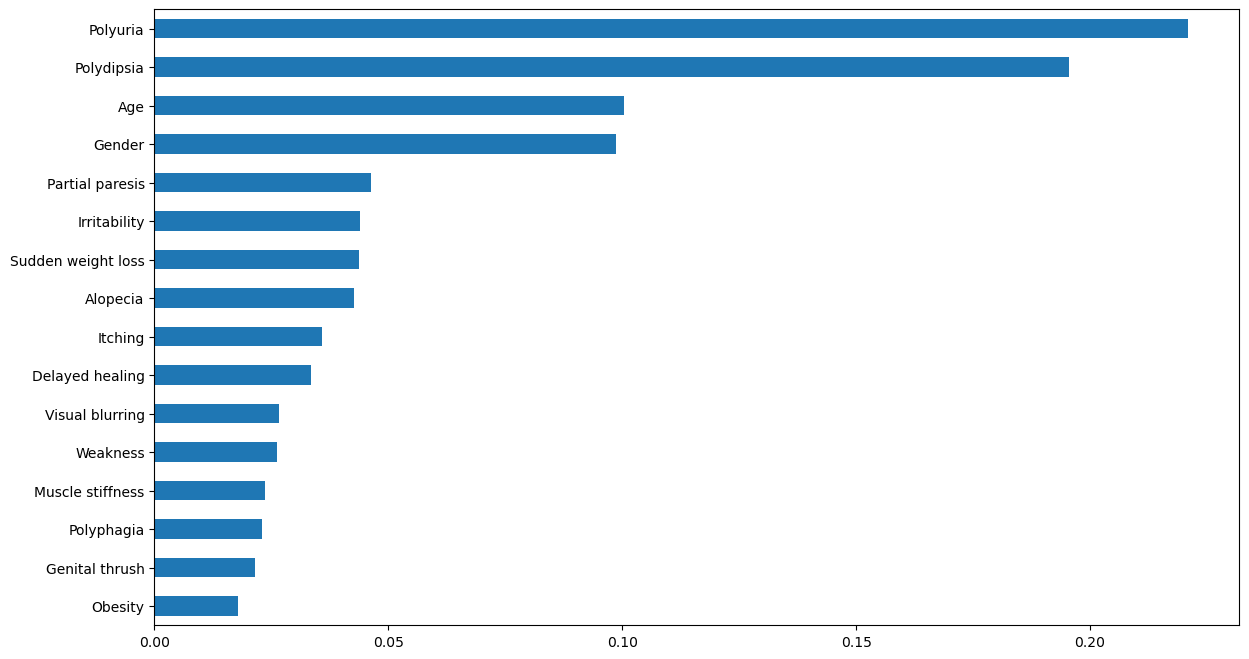

In [68]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(14, 8))

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [70]:
y_predict_dtree = dtree.predict(X_test)
roc=roc_auc_score(y_test, y_predict_dtree)
acc = accuracy_score(y_test, y_predict_dtree)
prec = precision_score(y_test, y_predict_dtree)
rec = recall_score(y_test, y_predict_dtree)
f1 = f1_score(y_test, y_predict_dtree)

results = pd.DataFrame([['Decision tree',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision tree,0.942308,0.983333,0.921875,0.951613,0.948437


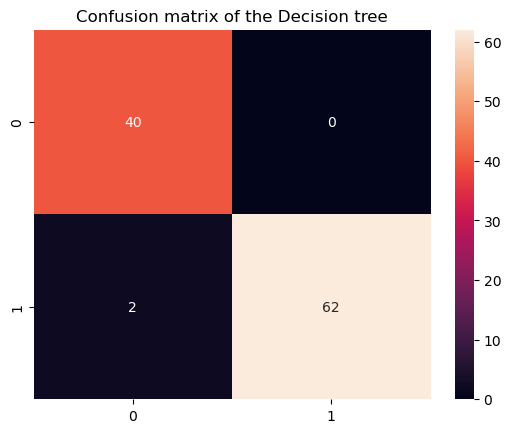

In [71]:
cm_dtree = confusion_matrix(y_test, y_predict_dtree)
plt.title('Confusion matrix of the Decision tree')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

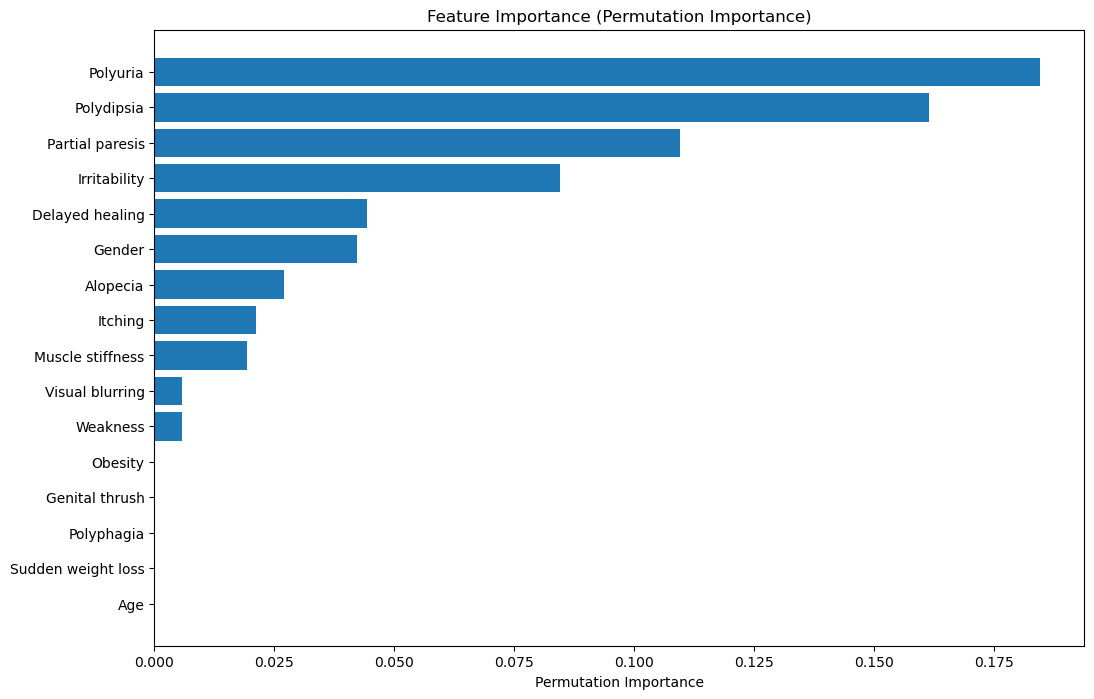

In [72]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(dtree, X_test, y_test)

# Get feature importances
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation Importance)')
plt.show()


In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

In [74]:
# Ensure X_test is a NumPy array
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
# Ensure that knn is properly trained and fitted before making predictions
knn.fit(X_train, y_train)

# Predict using the KNN classifier
y_predict_knn = knn.predict(X_test)

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_predict_knn)
roc = roc_auc_score(y_test, y_predict_knn)
prec = precision_score(y_test, y_predict_knn)
rec = recall_score(y_test, y_predict_knn)
f1 = f1_score(y_test, y_predict_knn)

# Create a DataFrame to store results
results = pd.DataFrame([[ 'K-Neighbours Classifier', acc, prec, rec, f1, roc ]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Display the results
results


  File "C:\Users\Dell\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Neighbours Classifier,0.961538,1.0,0.9375,0.967742,0.96875


In [75]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(X,y)

AdaBoostClassifier(base_estimator=None)

In [76]:
y_predict_adb = adb.predict(X_test)
roc=roc_auc_score(y_test, y_predict_adb)
acc = accuracy_score(y_test, y_predict_adb)
prec = precision_score(y_test, y_predict_adb)
rec = recall_score(y_test, y_predict_adb)
f1 = f1_score(y_test, y_predict_adb)

results = pd.DataFrame([['Adaboost Classifier',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost Classifier,0.615385,0.615385,1.0,0.761905,0.5


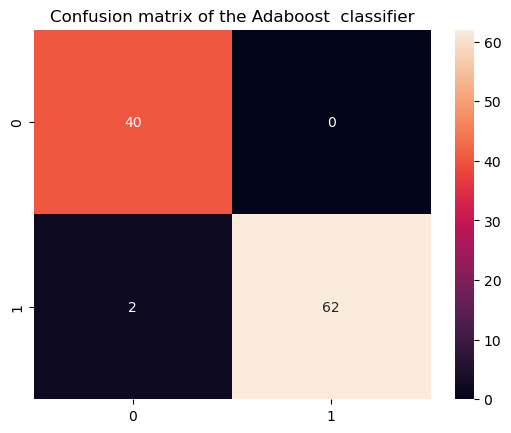

In [77]:
cm_adb = confusion_matrix(y_test, y_predict_adb)
plt.title('Confusion matrix of the Adaboost  classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

<Axes: >

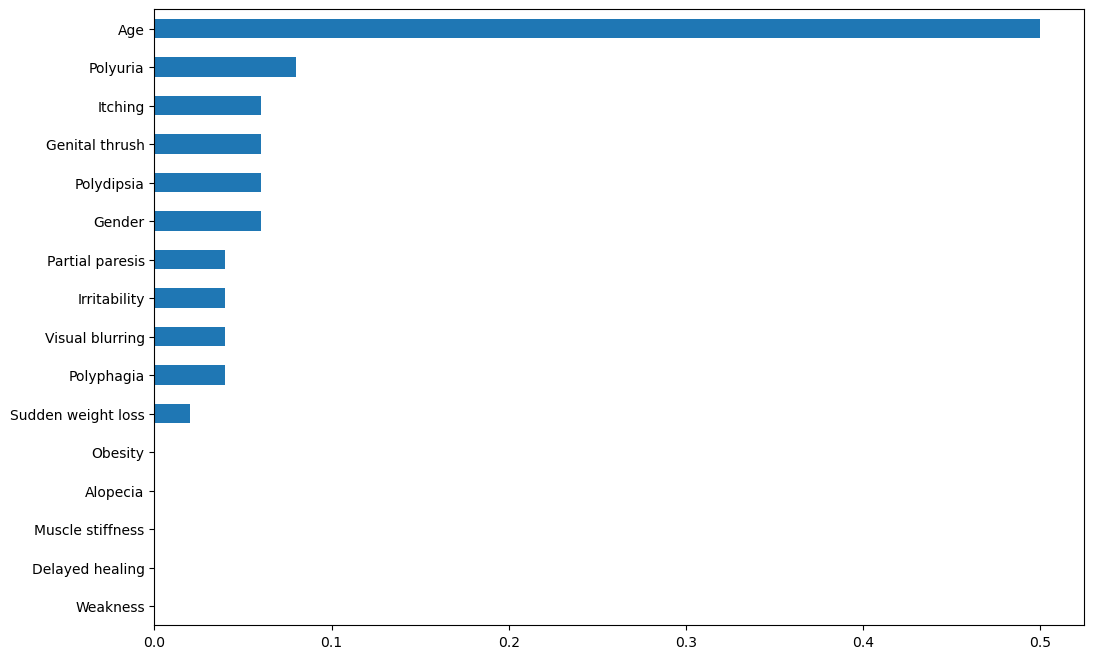

In [78]:
feat_importances = pd.Series(adb.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(12, 8))

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X,y)

GradientBoostingClassifier()

In [80]:
y_predict_gbc = gbc.predict(X_test)
roc=roc_auc_score(y_test, y_predict_gbc)
acc = accuracy_score(y_test, y_predict_gbc)
prec = precision_score(y_test, y_predict_gbc)
rec = recall_score(y_test, y_predict_gbc)
f1 = f1_score(y_test, y_predict_gbc)

results = pd.DataFrame([['Adaboost Classifier',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost Classifier,0.923077,0.924242,0.953125,0.938462,0.914062
